<a href="https://colab.research.google.com/github/alifabdullah/.vscode/blob/main/Ridge_lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('boston_housing.csv')

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
x = df.drop('MEDV', axis=1)
y = df['MEDV']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = scores
result  = np.mean(mse_scores)
result

np.float64(-23.65441827030464)

Ridge

In [10]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)
y_pred
accuracy = ridge_model.score(x_test, y_test)
accuracy

0.6684624359643558

In [11]:
mse = mean_squared_error(y_test, y_pred)
mse

24.312903830491614

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}
grid_search = GridSearchCV(ridge_model, param_grid ,scoring = 'neg_mean_squared_error',cv = 5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'alpha': 2}


np.float64(-23.646284736453758)

In [13]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
param_grid = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}
grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

print("Best alpha:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best alpha: {'alpha': 1}
Best score: -29.49640737047796


In [14]:
lasso_pred = grid_search.predict(x_test)
lasso_pred

array([25.98607901, 29.69947724, 17.86451976, 24.68564266, 19.52303372,
       22.73829033, 18.37606023, 15.18540808, 21.37141046, 20.36087397,
       20.00834578, 21.087778  ,  0.90763235, 22.42082697, 19.9581115 ,
       25.10816047, 18.14124221,  6.94444465, 36.41353681, 18.6795378 ,
       25.29589486, 26.6109486 , 13.89488981, 24.02519829, 18.68190255,
       15.16431497, 22.45295718, 18.8441478 , 19.13179791, 19.45755305,
       19.63846679, 25.26571644, 25.79741229, 18.80668172, 16.0559808 ,
       20.08644064, 31.03903052, 21.27986441, 20.76613814, 24.43974869,
       14.35442688, 27.60552111, 36.96468782, 19.23331116, 25.42532989,
       17.10436663, 15.85657302, 25.60956041, 19.48313703, 29.3275448 ,
       22.98075185, 31.41733989, 17.78465784, 25.86562078, 35.31088786,
       22.78846377, 19.55869491, 29.21587814, 24.5577775 , 16.57984857,
       25.57110583, 30.9067251 , 28.57377681, 17.61572343, 27.32840116,
       13.70501065, 20.37937635, 25.28431528, 28.07653111, 15.45

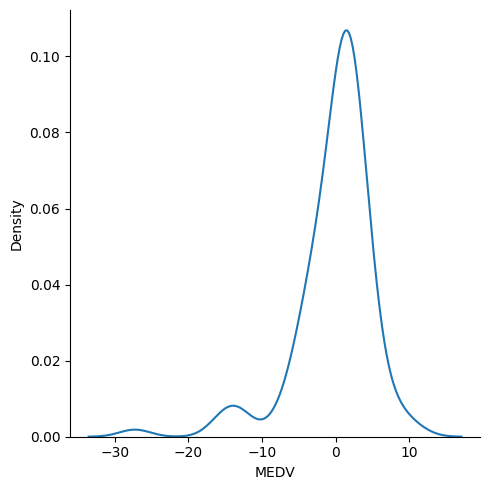

In [15]:
sns.displot(lasso_pred-y_test,kind='kde')